In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
trainlabel=traindata['label'].values

In [4]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [5]:
trainimages=trainimages.reshape(-1,28,28,1)


In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')
testimages = testdata.values

In [7]:
testlabel=testdata['label'].values



In [8]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [9]:
testimages=testimages.reshape(-1,28,28,1)

In [10]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
#model.add(BatchNormalization())
#model.add(Conv2D(64,(3,3),activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(BatchNormalization())
#model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Flatten())
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(26,activation="softmax"))


In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 256)               8

In [13]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')==1.0):
      print("\nReached 100.0% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [22]:
history=model.fit(trainimages,trainlabel,epochs=40,validation_split=0.2,callbacks=[callback])

Epoch 1/40
687/687 [==============================] - ETA: 0s - loss: 8.2088e-07 - accuracy: 1.0000
Reached 100.0% accuracy so cancelling training!
687/687 [==============================] - 24s 32ms/step - loss: 8.2088e-07 - accuracy: 1.0000 - val_loss: 4.5330e-06 - val_accuracy: 1.0000


In [20]:
model.evaluate(testimages,testlabel)[1]

225/225 [==============================] - 3s 11ms/step - loss: 0.7654 - accuracy: 0.9119


0.9118795394897461

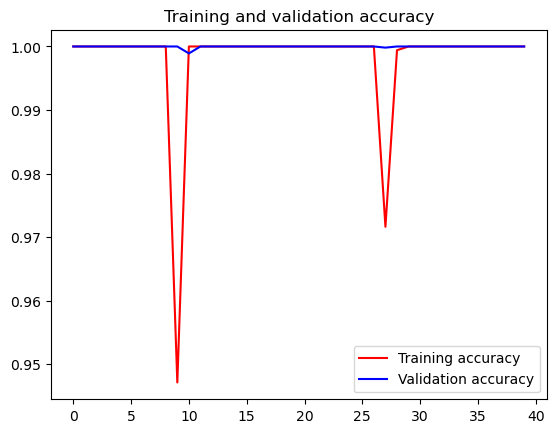

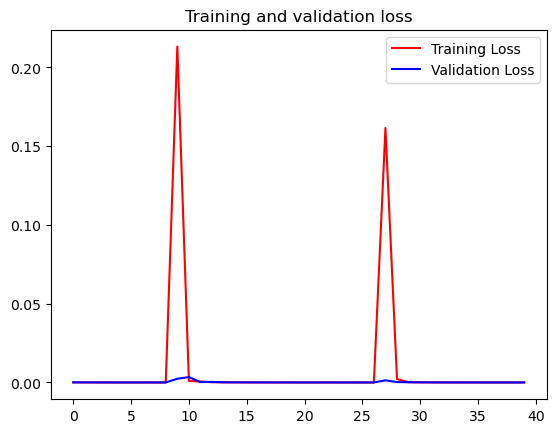

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
model.save('models\model2.h5')